# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**Anele Maphalala**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from matplotlib.pyplot import figure
import plotly.express as px

# Libraries for data preparation and model building
from sklearn.metrics import mean_squared_error
from sklearn import *
from sklearn.linear_model import *
from tqdm import tqdm
import math
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from datetime import date
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
import pickle

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = None

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
df_train = pd.read_csv("df_train.csv")
df_test = pd.read_csv("df_test.csv")

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory Data Analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


### Training Dataset

In [3]:
df_train.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [4]:
df_train.tail()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
8758,8758,2017-12-31 09:00:00,1.000000,level_6,0.0,2.666667,89.000000,95.666667,56.666667,4.333333,...,280.816667,281.276667,285.150000,287.573333,280.483333,290.150000,284.816667,279.686667,278.483333,-28.333333
8759,8759,2017-12-31 12:00:00,5.000000,level_6,0.0,2.000000,82.000000,85.000000,26.666667,8.000000,...,283.483333,287.483333,286.483333,288.616667,287.150000,291.150000,287.150000,282.400000,280.150000,2266.666667
8760,8760,2017-12-31 15:00:00,6.333333,level_9,0.4,7.333333,67.666667,71.000000,63.333333,8.333333,...,285.150000,289.816667,283.816667,285.330000,289.150000,286.816667,289.150000,283.956667,281.150000,822.000000
8761,8761,2017-12-31 18:00:00,7.333333,level_8,0.2,7.333333,67.666667,79.000000,63.333333,2.666667,...,283.483333,287.523333,278.816667,281.410000,286.816667,284.150000,289.150000,282.666667,280.816667,-760.000000
8762,8762,2017-12-31 21:00:00,4.333333,level_9,0.0,7.000000,78.666667,68.666667,20.000000,1.666667,...,282.150000,287.483333,276.816667,281.020000,287.150000,285.150000,287.483333,281.396667,280.483333,2780.666667


In [5]:
# Display basic information about the training data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [6]:
# Display descriptive statistics of the training data
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8763.0,4381.000000,2529.804538,0.000000,2190.500000,4381.000000,6571.500000,8.762000e+03
Madrid_wind_speed,8763.0,2.425729,1.850371,0.000000,1.000000,2.000000,3.333333,1.300000e+01
Bilbao_rain_1h,8763.0,0.135753,0.374901,0.000000,0.000000,0.000000,0.100000,3.000000e+00
Valencia_wind_speed,8763.0,2.586272,2.411190,0.000000,1.000000,1.666667,3.666667,5.200000e+01
Seville_humidity,8763.0,62.658793,22.621226,8.333333,44.333333,65.666667,82.000000,1.000000e+02
Madrid_humidity,8763.0,57.414717,24.335396,6.333333,36.333333,58.000000,78.666667,1.000000e+02
Bilbao_clouds_all,8763.0,43.469132,32.551044,0.000000,10.000000,45.000000,75.000000,1.000000e+02
Bilbao_wind_speed,8763.0,1.850356,1.695888,0.000000,0.666667,1.000000,2.666667,1.266667e+01
Seville_clouds_all,8763.0,13.714748,24.272482,0.000000,0.000000,0.000000,20.000000,9.733333e+01
Bilbao_wind_deg,8763.0,158.957511,102.056299,0.000000,73.333333,147.000000,234.000000,3.593333e+02


In [7]:
# Check for missing values in the training data
df_train_missing_values = df_train.isnull().sum()
df_train_missing_values

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

- Only the 'Valencia_pressure' column has missing values (2068 missing entries).

### Testing Dataset

In [8]:
df_test.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


In [9]:
df_test.tail()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
2915,11678,2018-12-31 09:00:00,0.333333,level_9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,...,279.816667,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000
2916,11679,2018-12-31 12:00:00,0.333333,level_8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,...,286.483333,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280.483333
2917,11680,2018-12-31 15:00:00,1.000000,level_6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,...,289.483333,288.816667,288.820000,284.150000,285.073333,288.150000,285.816667,290.816667,287.733333,286.483333
2918,11681,2018-12-31 18:00:00,1.000000,level_6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,...,285.816667,285.150000,284.473333,280.150000,281.626667,283.150000,282.816667,287.483333,283.813333,282.150000
2919,11682,2018-12-31 21:00:00,1.333333,level_10,0.0,2.333333,61.666667,69.333333,0.000000,1.333333,...,283.816667,276.816667,281.133333,276.150000,276.450000,278.483333,276.816667,283.816667,276.623333,276.483333


In [10]:
# Display basic information about the testing data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2920 non-null   int64  
 1   time                  2920 non-null   object 
 2   Madrid_wind_speed     2920 non-null   float64
 3   Valencia_wind_deg     2920 non-null   object 
 4   Bilbao_rain_1h        2920 non-null   float64
 5   Valencia_wind_speed   2920 non-null   float64
 6   Seville_humidity      2920 non-null   float64
 7   Madrid_humidity       2920 non-null   float64
 8   Bilbao_clouds_all     2920 non-null   float64
 9   Bilbao_wind_speed     2920 non-null   float64
 10  Seville_clouds_all    2920 non-null   float64
 11  Bilbao_wind_deg       2920 non-null   float64
 12  Barcelona_wind_speed  2920 non-null   float64
 13  Barcelona_wind_deg    2920 non-null   float64
 14  Madrid_clouds_all     2920 non-null   float64
 15  Seville_wind_speed   

In [11]:
# Display descriptive statistics of the testing data
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2920.0,10222.500000,843.075718,8763.000000,9492.750000,10222.500000,10952.250000,11682.000000
Madrid_wind_speed,2920.0,2.457820,1.774838,0.000000,1.333333,2.000000,3.333333,13.333333
Bilbao_rain_1h,2920.0,0.067517,0.153381,0.000000,0.000000,0.000000,0.000000,1.600000
Valencia_wind_speed,2920.0,3.012785,1.996340,0.000000,1.666667,2.333333,4.000000,14.333333
Seville_humidity,2920.0,67.123516,20.611292,11.666667,52.000000,70.333333,85.000000,100.000000
Madrid_humidity,2920.0,62.644463,24.138393,8.000000,43.000000,63.000000,84.000000,100.000000
Bilbao_clouds_all,2920.0,43.355422,30.486298,0.000000,13.333333,45.000000,75.000000,97.333333
Bilbao_wind_speed,2920.0,2.283562,1.654787,0.000000,1.000000,1.666667,3.333333,10.666667
Seville_clouds_all,2920.0,15.477283,25.289197,0.000000,0.000000,0.000000,20.000000,93.333333
Bilbao_wind_deg,2920.0,162.643836,97.749873,0.000000,86.666667,140.000000,233.333333,360.000000


In [12]:
# Check for missing values in the testing data
df_test_missing_values = df_test.isnull().sum()
df_test_missing_values

Unnamed: 0                0
time                      0
Madrid_wind_speed         0
Valencia_wind_deg         0
Bilbao_rain_1h            0
Valencia_wind_speed       0
Seville_humidity          0
Madrid_humidity           0
Bilbao_clouds_all         0
Bilbao_wind_speed         0
Seville_clouds_all        0
Bilbao_wind_deg           0
Barcelona_wind_speed      0
Barcelona_wind_deg        0
Madrid_clouds_all         0
Seville_wind_speed        0
Barcelona_rain_1h         0
Seville_pressure          0
Seville_rain_1h           0
Bilbao_snow_3h            0
Barcelona_pressure        0
Seville_rain_3h           0
Madrid_rain_1h            0
Barcelona_rain_3h         0
Valencia_snow_3h          0
Madrid_weather_id         0
Barcelona_weather_id      0
Bilbao_pressure           0
Seville_weather_id        0
Valencia_pressure       454
Seville_temp_max          0
Madrid_pressure           0
Valencia_temp_max         0
Valencia_temp             0
Bilbao_weather_id         0
Seville_temp        

- Only the "Valencia_pressure" column has missing values (454 missing entries).

### Visualization

Distribution of `load_shortfall_3h`

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x480 with 0 Axes>

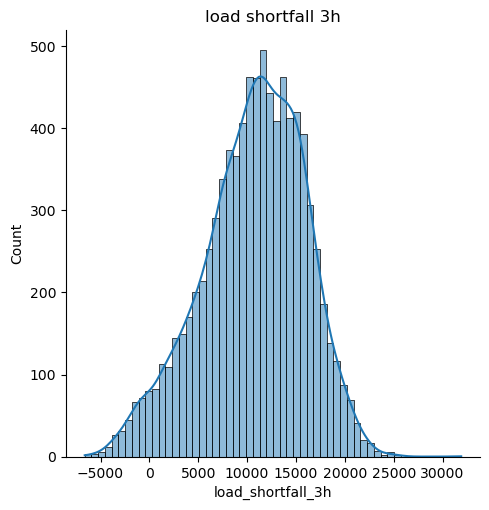

In [13]:
# Distribution of train data target variable ("load_shortfall_3h")
figure(figsize=(15, 6), dpi=80)
sns.displot(df_train['load_shortfall_3h'], kde=True)
plt.title('load shortfall 3h')
plt.show()

- The target variable ("load_shortfall_3h") is fairly symmetrical indicating normal distribution

In [14]:
fig = px.histogram(df_train, 
                   x=df_train['load_shortfall_3h'], 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of 3 hour load shortfall ')
fig.update_layout(bargap=0.90)
fig.show()

The histogram represents the distribution of the `load_shortfall_3h` variable and the boxplot provides additional information about the spread and central tendency of the data alongside the five-number summary. 
- A normal distribution is seen once again which implies that the majority of the data points are clustered around the mean value, with fewer data points occurring further away from the mean in a symmetric fashion and provides crucial information about the typical behavior and variability of load shortfalls, which can be leveraged to improve decision-making processes and enhance the performance of the predictive models.

With a normal distribution, more accurate predictions can be made about future load shortfalls based on historical data. Since the majority of observations fall around the mean, new data points are expected to exhibit a similar distribution pattern, allowing for better forecasting of load shortfalls.

Correlation Matrix

In [15]:
# Separation of features based on data type
numbers = ['int64', 'float64']
df_train_numerical = df_train.select_dtypes(include=numbers)
df_train_categorical= df_train.select_dtypes(include='object')

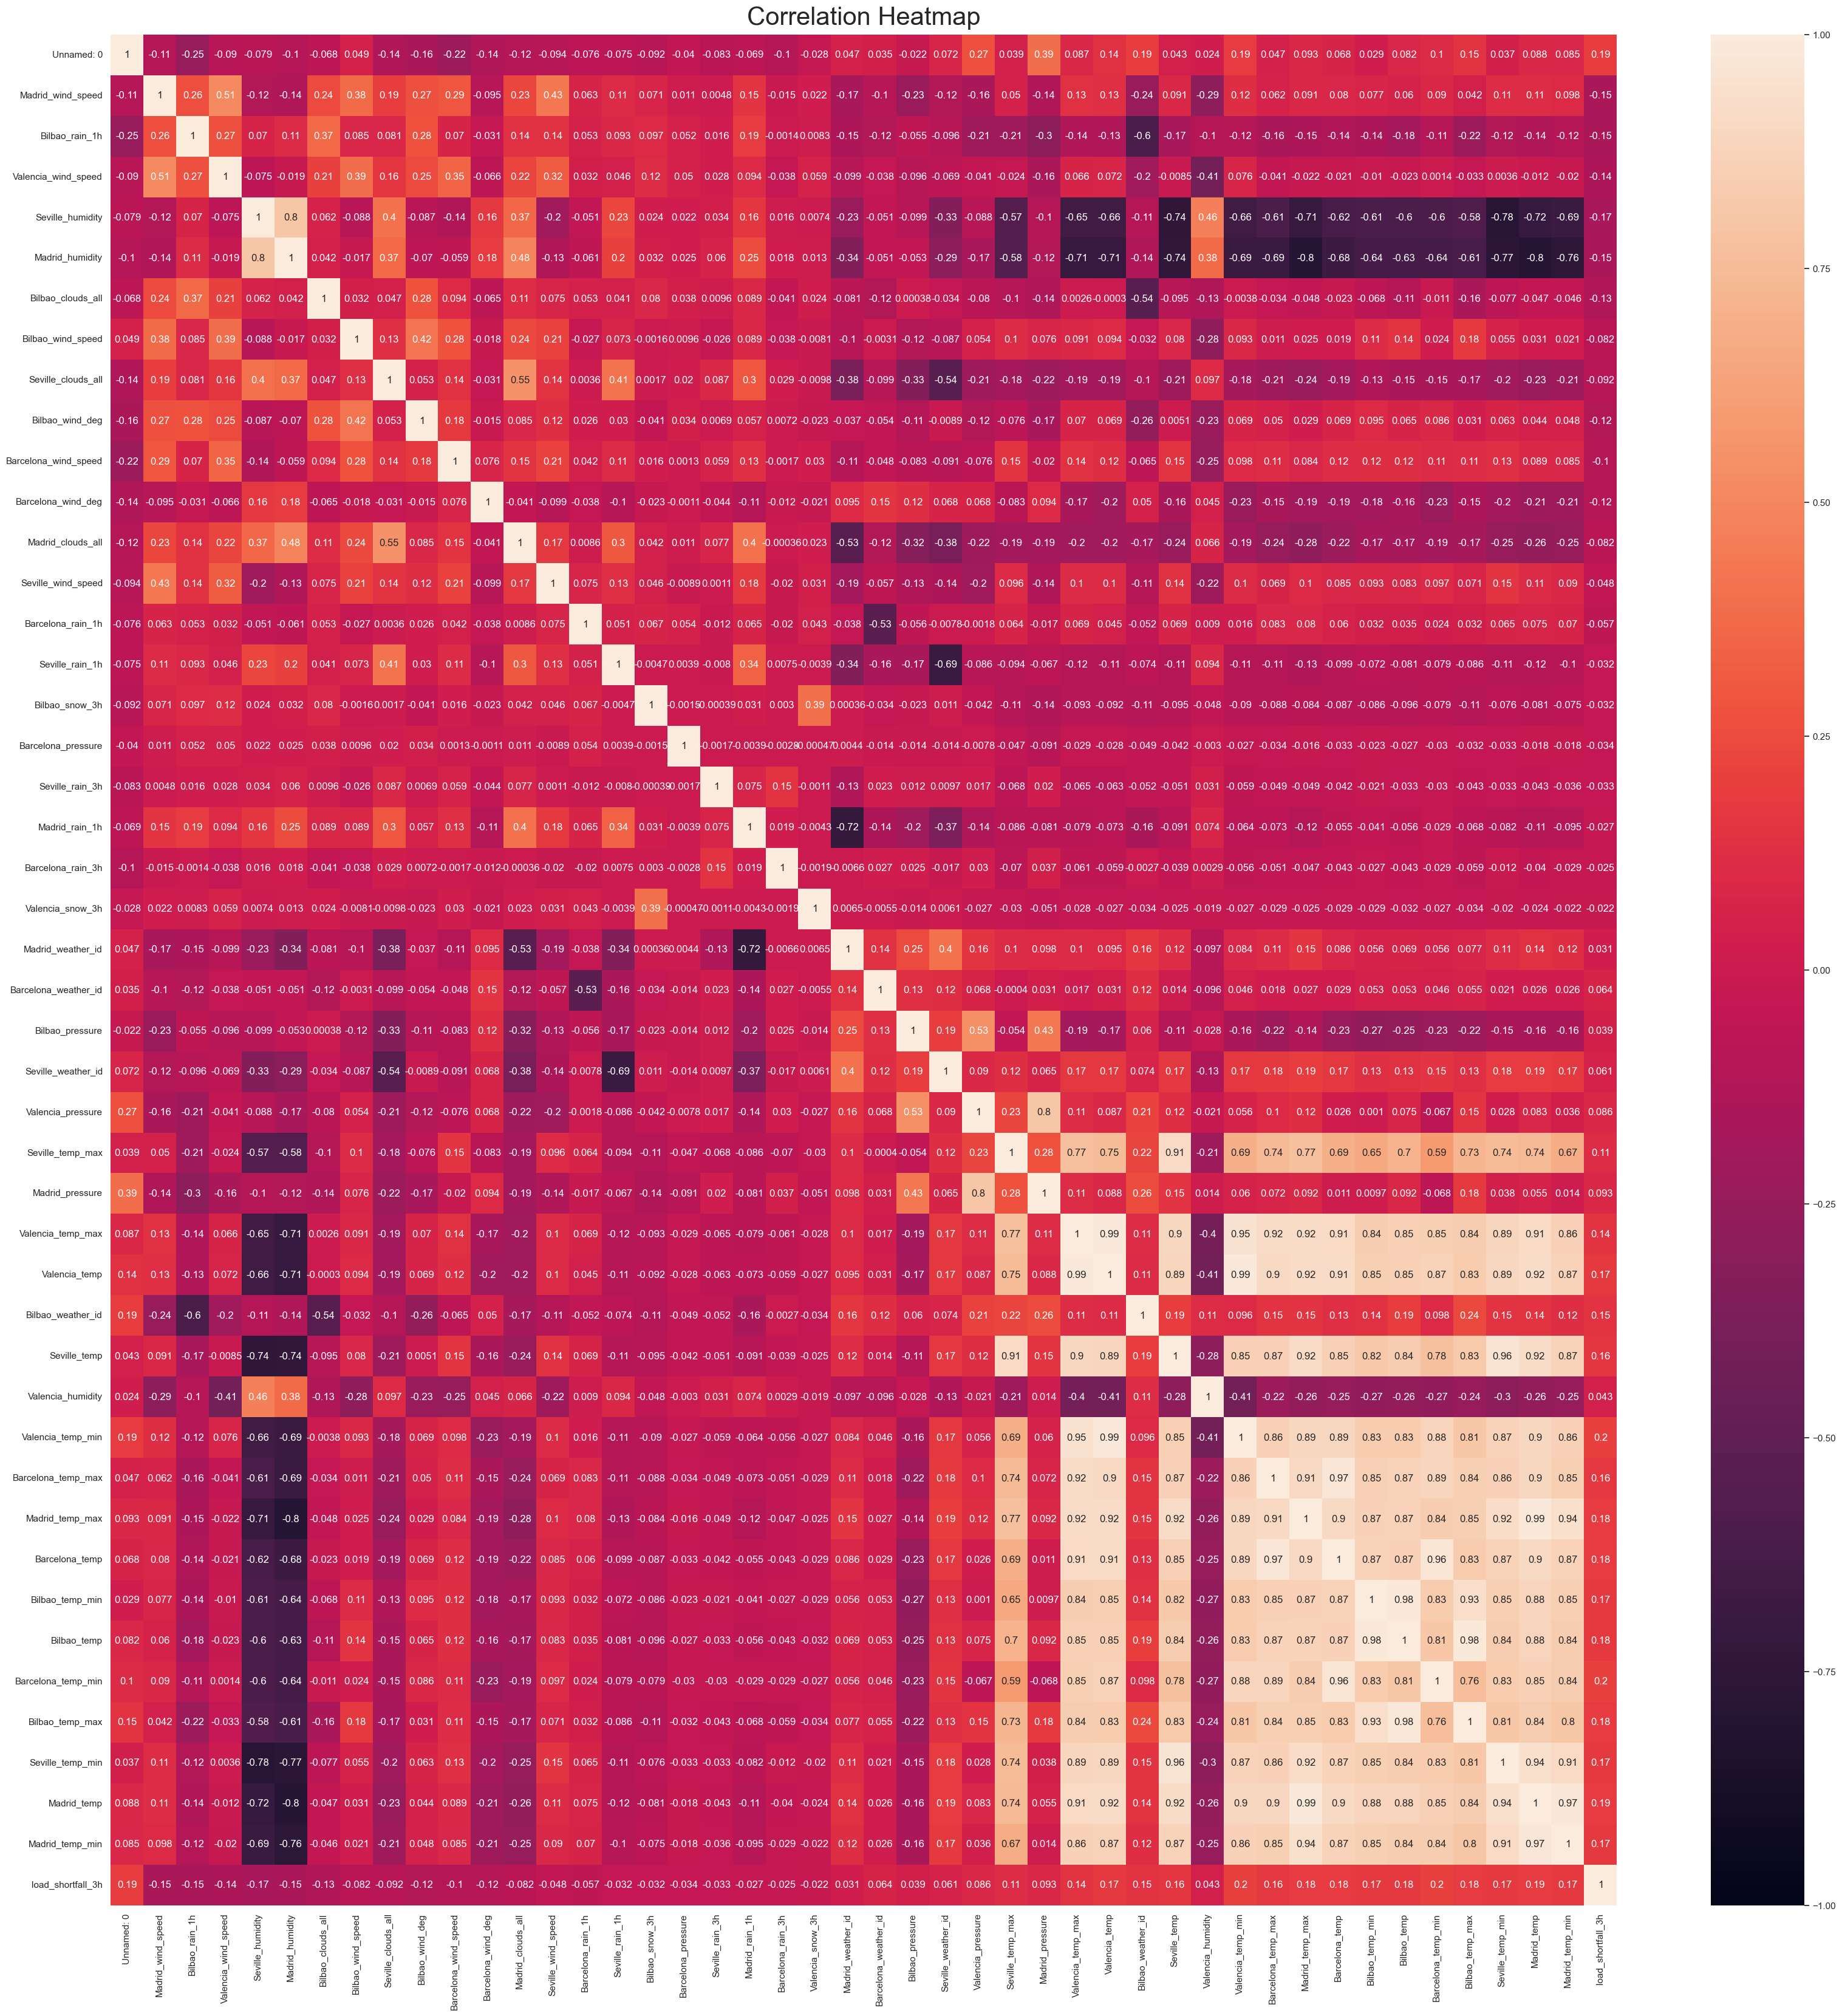

In [16]:
heatmap = sns.set (rc = {'figure.figsize':(40, 40)})
heatmap = sns.heatmap(df_train_numerical.corr(numeric_only=True), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':30}, pad=12)
plt.show()

Correlation heatmaps help highlight which features are highly correlated with the target variable(`load_shortfall_3h`) and with each other
- There is a strong correlation between the maximum temperatures and minimium tempearatures in different cities which could can be a result of interplay between fundamental meteorological processes, geographical and climatic factors, weather dynamics, seasonal variations, and the consistent measurement of temperature extremes provided by the dataset. Spain is geographically diverse, with a wide range of landscapes including mountains, coastal regions, and interior plains. Despite this diversity, cities within Spain generally experience similar weather patterns due to the country's relatively small size compared to larger countries.

Distribution of `load_shortfall_3h` across the years

In [17]:
df_train_year = df_train

In [18]:
# Convert time column to datetime
df_train_year['time'] = pd.to_datetime(df_train_year['time'])

In [19]:
print(df_train_year['time'].dtype) 

datetime64[ns]


In [20]:
# Extract year, month, day, and time from the "time" column
df_train_year['year'] = df_train_year['time'].dt.year
df_train_year['hour'] = df_train_year['time'].dt.hour
df_train_year['day'] = df_train_year['time'].dt.day
df_train_year['month'] = df_train_year['time'].dt.month
df_train_year['minute'] = df_train_year['time'].dt.minute
df_train_year['second'] = df_train_year['time'].dt.second

Text(0.5, 1.0, 'Total Load Shortfall per Year')

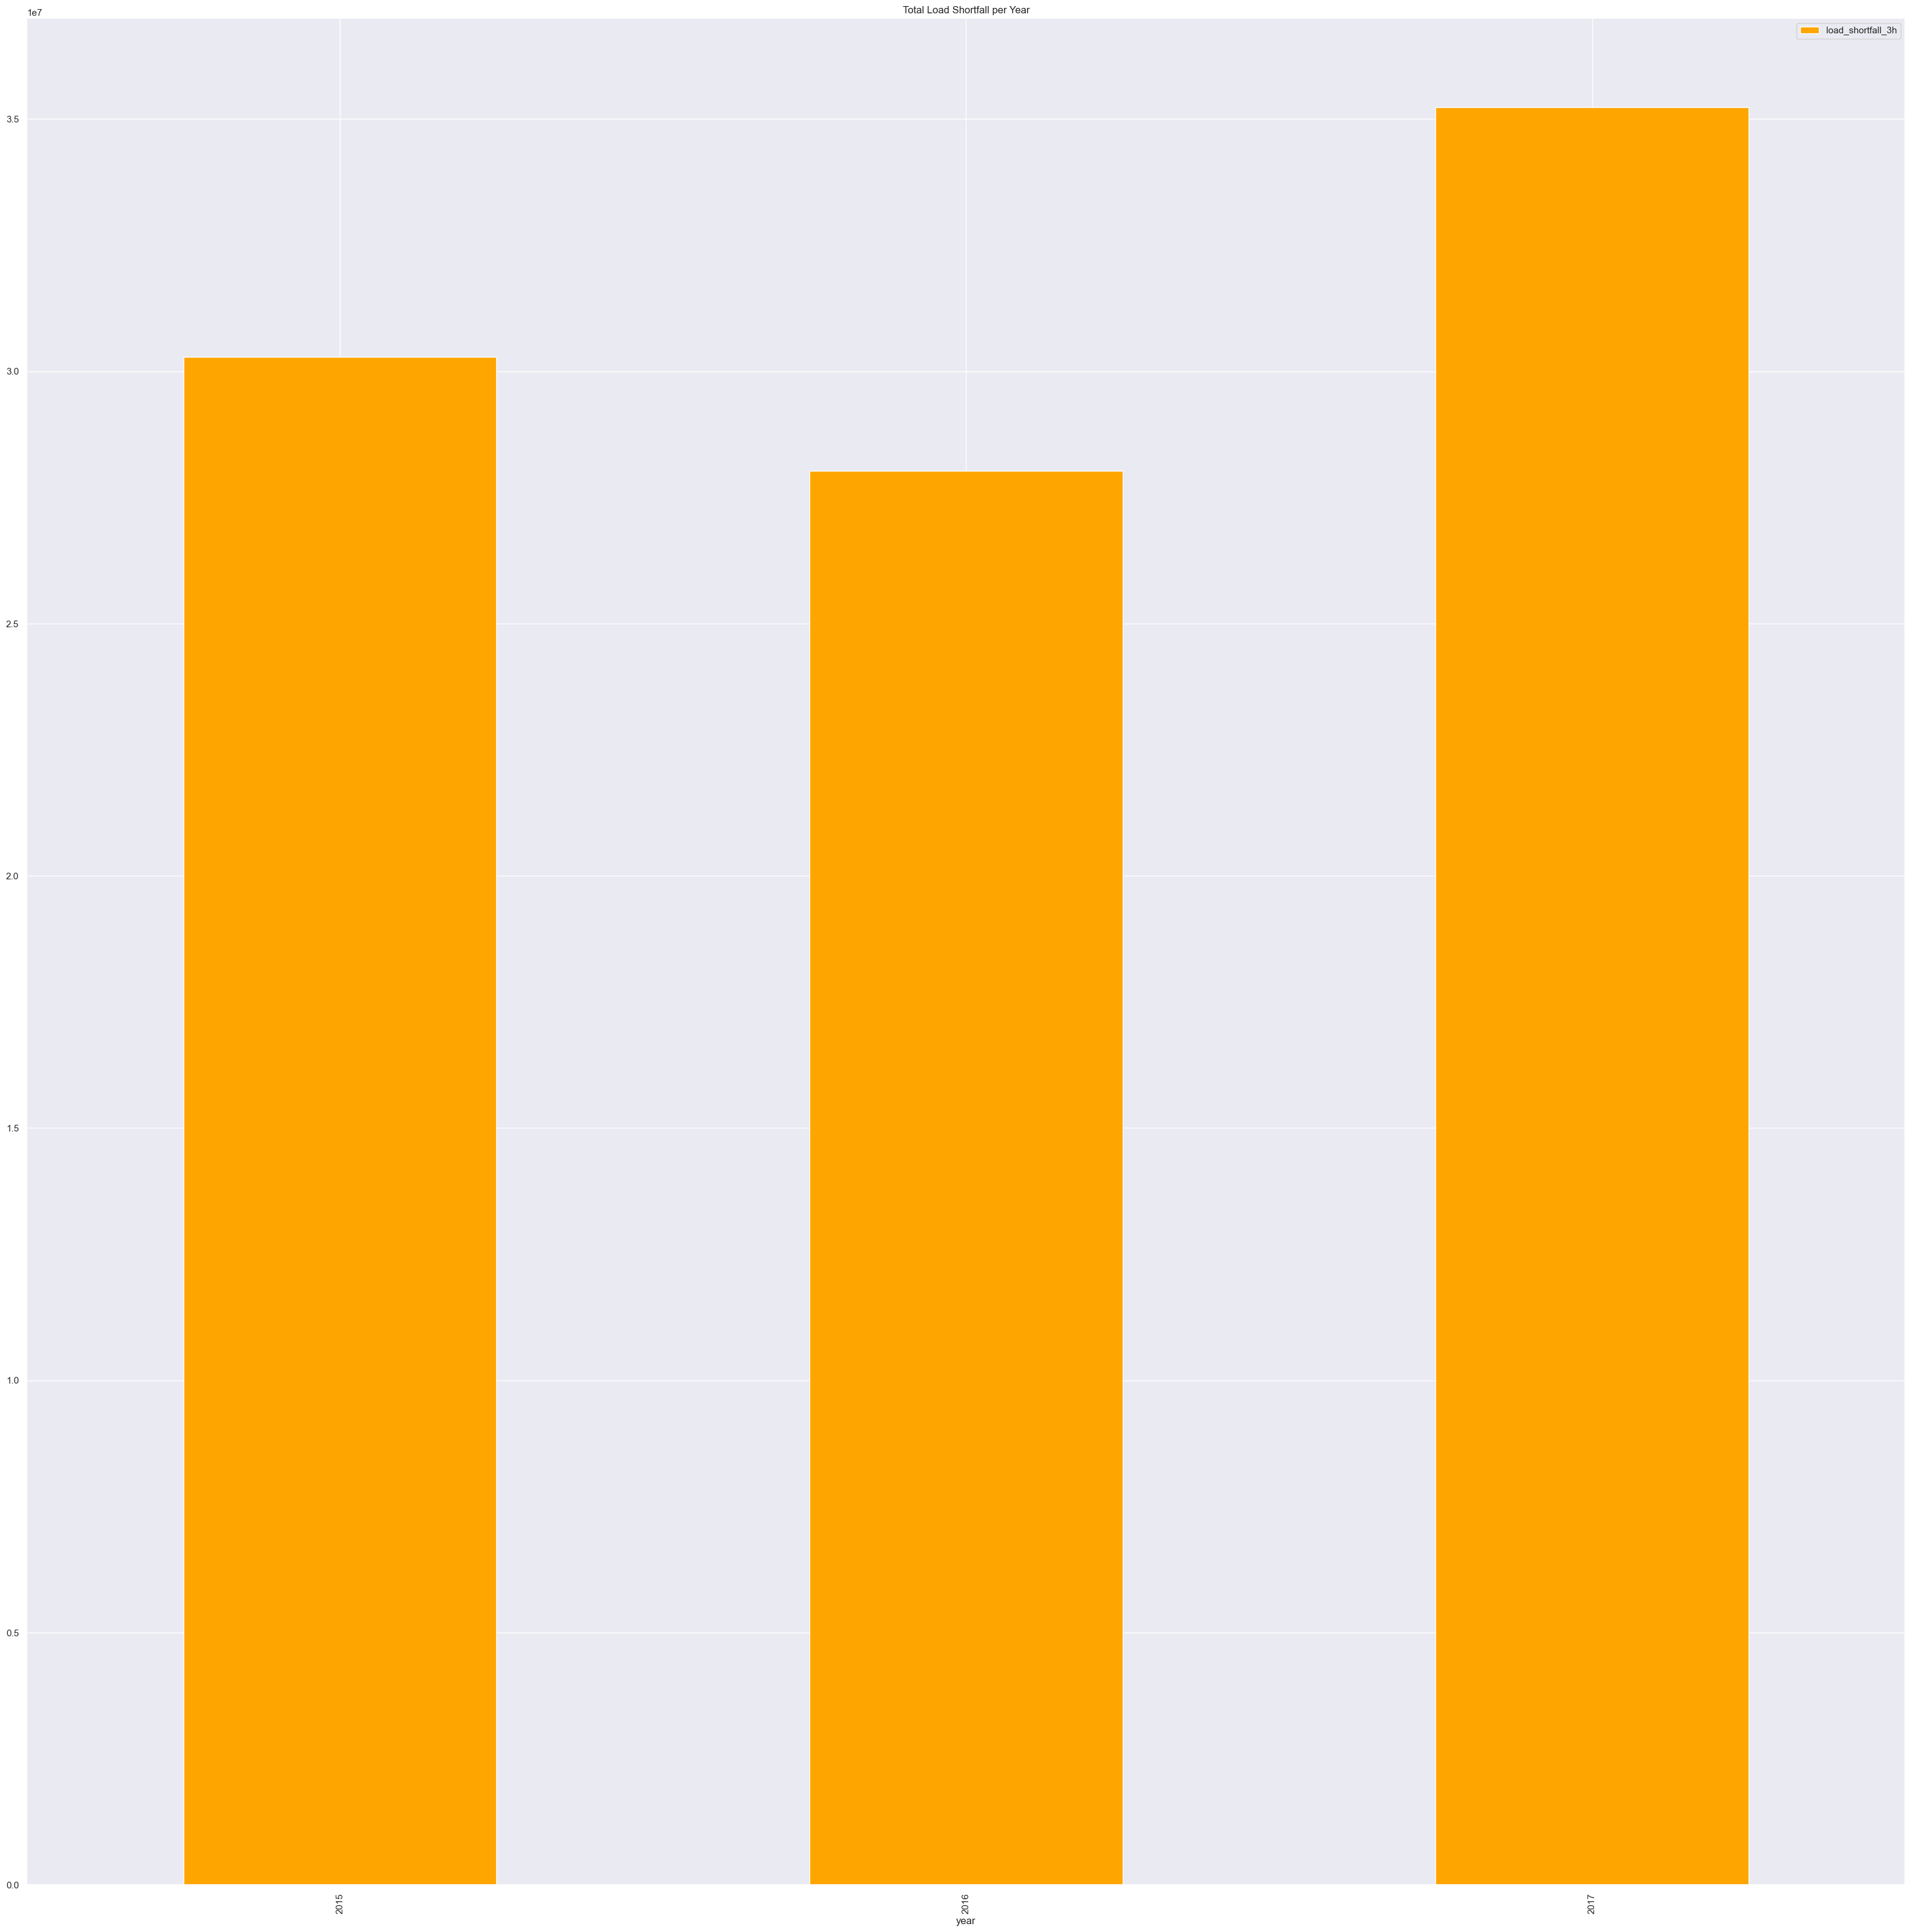

In [21]:
df_train_year[['year','load_shortfall_3h']].groupby('year').sum().plot.bar(color='orange')
plt.title('Total Load Shortfall per Year')

This metric indicates the periods when the energy generation from these sources was insufficient to meet the demand over a three-hour interval.

In the year 2016:
- There was a low load shortfall which suggest periods where the energy generation was more capable of meeting demand. This could be a result of improved energy generation technologies, better integration of renewable sources, or effective energy management strategies.

In the year 2017: 
- There was a high load shortfall that might indicate periods when the combined energy generation from fossil fuels and renewables was insufficient to meet demand. This could be due to increased energy consumption, reduced generation capacity, or inefficiencies in the energy system.

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data Engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

##### 4.1 Convert time into DateTime format

In [22]:
# Convert time column to datetime
df_train['time'] = pd.to_datetime(df_train['time'])
df_train['hour'] = df_train['time'].dt.hour
df_train['day'] = df_train['time'].dt.day
df_train['month'] = df_train['time'].dt.month

# Check data type
print(df_train['time'].dtype) 

datetime64[ns]


In [23]:
# Convert time column to datetime
df_test['time'] = pd.to_datetime(df_test['time'])
df_test['hour'] = df_test['time'].dt.hour
df_test['day'] = df_test['time'].dt.day
df_test['month'] = df_test['time'].dt.month

# Check data type
print(df_test['time'].dtype) 

datetime64[ns]


##### 4.2 Drop unnecessary columns

In [24]:
# Drop the "Unnamed: 0" column in the Train dataset
df_train.drop('Unnamed: 0', axis=1, inplace=True)

In [25]:
# Drop the "Unnamed: 0" column in the Test dataset
df_test.drop('Unnamed: 0', axis=1, inplace=True)

##### 4.3 Handling categorical columns

Train dataset

In [26]:
df_train.select_dtypes(include=['object']).head()

,Valencia_wind_deg,Seville_pressure
0,level_5,sp25
1,level_10,sp25
2,level_9,sp25
3,level_8,sp25
4,level_7,sp25


In [27]:
df_train = pd.get_dummies(df_train, columns=['Valencia_wind_deg'], drop_first=True)

In [28]:
df_train = pd.get_dummies(df_train, columns=['Seville_pressure'], drop_first=True)

Test dataset

In [29]:
df_test.select_dtypes(include=['object']).head()

,Valencia_wind_deg,Seville_pressure
0,level_8,sp25
1,level_8,sp25
2,level_7,sp25
3,level_7,sp25
4,level_7,sp25


In [30]:
df_test = pd.get_dummies(df_test, columns=['Valencia_wind_deg'], drop_first=True)

In [31]:
df_test = pd.get_dummies(df_test, columns=['Seville_pressure'], drop_first=True)

##### 4.4 Handling nan values

Train dataset

In [32]:
# Check for NaN values in the entire DataFrame
nan_values = df_train.isna().sum()
nan_values_in_column = df_train['Valencia_pressure'].isna().sum()

print(nan_values)

time                    0
Madrid_wind_speed       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
                       ..
Seville_pressure_sp5    0
Seville_pressure_sp6    0
Seville_pressure_sp7    0
Seville_pressure_sp8    0
Seville_pressure_sp9    0
Length: 85, dtype: int64


In [33]:
nan_values_in_column = df_train['Valencia_pressure'].isna().sum()
print(f"The number of nan values in the 'Valencia_pressure' column: {nan_values_in_column}")

The number of nan values in the 'Valencia_pressure' column: 2068


In [34]:
mean_value = df_train['Valencia_pressure'].mean()
df_train['Valencia_pressure'].fillna(mean_value, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_20596\2225826155.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [35]:
nan_values_in_column = df_train['Valencia_pressure'].isna().sum()
print(f"The number of nan values in the 'Valencia_pressure' column: {nan_values_in_column}")

The number of nan values in the 'Valencia_pressure' column: 0


Test dataset

In [36]:
# Check for NaN values in the entire DataFrame
nan_values = df_test.isna().sum()
nan_values_in_column = df_test['Valencia_pressure'].isna().sum()

print(nan_values)

time                    0
Madrid_wind_speed       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
                       ..
Seville_pressure_sp5    0
Seville_pressure_sp6    0
Seville_pressure_sp7    0
Seville_pressure_sp8    0
Seville_pressure_sp9    0
Length: 81, dtype: int64


In [37]:
nan_values_in_column = df_test['Valencia_pressure'].isna().sum()
print(f"The number of nan values in the 'Valencia_pressure' column: {nan_values_in_column}")

The number of nan values in the 'Valencia_pressure' column: 454


In [38]:
mean_value = df_test['Valencia_pressure'].mean()
df_test['Valencia_pressure'].fillna(mean_value, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_20596\112680247.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [39]:
nan_values_in_column = df_test['Valencia_pressure'].isna().sum()
print(f"The number of nan values in the 'Valencia_pressure' column: {nan_values_in_column}")

The number of nan values in the 'Valencia_pressure' column: 0


##### 4.5 Drop columns for better model performance

In [40]:
df_train.columns

Index(['time', 'Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed',
       'Seville_humidity', 'Madrid_humidity', 'Bilbao_clouds_all',
       'Bilbao_wind_speed', 'Seville_clouds_all', 'Bilbao_wind_deg',
       'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Madrid_clouds_all',
       'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min',
       'Madrid_temp', 'Madrid_temp_min', 'load

In [41]:
df_train = df_train.drop(['time','Bilbao_rain_1h', 
                      'Bilbao_clouds_all', 
                      'Seville_clouds_all', 
                      'Madrid_clouds_all', 
                      'Barcelona_rain_1h', 
                      'Seville_rain_1h', 
                      'Bilbao_snow_3h', 
                      'Seville_rain_3h', 
                      'Madrid_rain_1h', 
                      'Barcelona_rain_3h', 
                      'Valencia_snow_3h', 
                      'Madrid_weather_id', 
                      'Barcelona_weather_id', 
                      'Seville_weather_id', 
                      'Bilbao_weather_id', 
                      'Barcelona_temp_max',
                      'Barcelona_temp_min',
                      'Bilbao_temp_max',
                      'Bilbao_temp_min',
                      'Madrid_temp_max',
                      'Madrid_temp_min', 
                      'Seville_temp_min', 
                      'Valencia_temp_min', 'minute', 'second', 'year'], axis=1)

In [42]:
df_train.columns

Index(['Madrid_wind_speed', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_wind_speed', 'Bilbao_wind_deg',
       'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Seville_wind_speed',
       'Barcelona_pressure', 'Bilbao_pressure', 'Valencia_pressure',
       'Seville_temp_max', 'Madrid_pressure', 'Valencia_temp_max',
       'Valencia_temp', 'Seville_temp', 'Valencia_humidity', 'Barcelona_temp',
       'Bilbao_temp', 'Madrid_temp', 'load_shortfall_3h', 'hour', 'day',
       'month', 'Valencia_wind_deg_level_10', 'Valencia_wind_deg_level_2',
       'Valencia_wind_deg_level_3', 'Valencia_wind_deg_level_4',
       'Valencia_wind_deg_level_5', 'Valencia_wind_deg_level_6',
       'Valencia_wind_deg_level_7', 'Valencia_wind_deg_level_8',
       'Valencia_wind_deg_level_9', 'Seville_pressure_sp10',
       'Seville_pressure_sp11', 'Seville_pressure_sp12',
       'Seville_pressure_sp13', 'Seville_pressure_sp14',
       'Seville_pressure_sp15', 'Seville_pressure_sp16'

In [43]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Madrid_wind_speed           8763 non-null   float64
 1   Valencia_wind_speed         8763 non-null   float64
 2   Seville_humidity            8763 non-null   float64
 3   Madrid_humidity             8763 non-null   float64
 4   Bilbao_wind_speed           8763 non-null   float64
 5   Bilbao_wind_deg             8763 non-null   float64
 6   Barcelona_wind_speed        8763 non-null   float64
 7   Barcelona_wind_deg          8763 non-null   float64
 8   Seville_wind_speed          8763 non-null   float64
 9   Barcelona_pressure          8763 non-null   float64
 10  Bilbao_pressure             8763 non-null   float64
 11  Valencia_pressure           8763 non-null   float64
 12  Seville_temp_max            8763 non-null   float64
 13  Madrid_pressure             8763 

In [44]:
#Dropping columns to help our model perform better. 

df_test = df_test.drop(['time','Bilbao_rain_1h', 
                      'Bilbao_clouds_all', 
                      'Seville_clouds_all', 
                      'Madrid_clouds_all', 
                      'Barcelona_rain_1h', 
                      'Seville_rain_1h', 
                      'Bilbao_snow_3h', 
                      'Seville_rain_3h', 
                      'Madrid_rain_1h', 
                      'Barcelona_rain_3h', 
                      'Valencia_snow_3h', 
                      'Madrid_weather_id', 
                      'Barcelona_weather_id', 
                      'Seville_weather_id', 
                      'Bilbao_weather_id', 
                      'Barcelona_temp_max',
                      'Barcelona_temp_min',
                      'Bilbao_temp_max',
                      'Bilbao_temp_min',
                      'Madrid_temp_max',
                      'Madrid_temp_min', 
                      'Seville_temp_min', 
                      'Valencia_temp_min'], axis=1)

In [45]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Madrid_wind_speed           2920 non-null   float64
 1   Valencia_wind_speed         2920 non-null   float64
 2   Seville_humidity            2920 non-null   float64
 3   Madrid_humidity             2920 non-null   float64
 4   Bilbao_wind_speed           2920 non-null   float64
 5   Bilbao_wind_deg             2920 non-null   float64
 6   Barcelona_wind_speed        2920 non-null   float64
 7   Barcelona_wind_deg          2920 non-null   float64
 8   Seville_wind_speed          2920 non-null   float64
 9   Barcelona_pressure          2920 non-null   float64
 10  Bilbao_pressure             2920 non-null   float64
 11  Valencia_pressure           2920 non-null   float64
 12  Seville_temp_max            2920 non-null   float64
 13  Madrid_pressure             2920 

##### 4.6 Split Dataset

Rearrange the order

In [46]:
## Splitting our data into dependent Variable and Independent Variable
X = df_train.drop(columns = 'load_shortfall_3h')
y = df_train['load_shortfall_3h'].astype('int')

In [47]:
# Convert datetime columns to numerical format
for col in X.select_dtypes(include=[np.datetime64]):
    X[col] = X[col].astype('int64')

# Convert boolean columns to integers
for col in X.select_dtypes(include=[bool]):
    X[col] = X[col].astype('int')

# Select only numeric columns for feature selection
X_numeric = X.select_dtypes(include=[np.number])

# Perform feature selection
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_numeric, y)

# Create DataFrame for scores and feature names
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_numeric.columns)

# Concatenate and name columns
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Features', 'Score']

# Get the top 40 features and sort them by score
top_features = featureScores.sort_values(by='Score', ascending=False).head(40)

# Display the least important 10 features among the top 40
top_features.tail(10)

,Features,Score
47,Seville_pressure_sp23,6621.855015
36,Seville_pressure_sp13,6606.793000
44,Seville_pressure_sp20,6580.192647
50,Seville_pressure_sp3,6577.564725
51,Seville_pressure_sp4,6536.990099
52,Seville_pressure_sp5,6518.262097
35,Seville_pressure_sp12,6480.167989
48,Seville_pressure_sp24,6479.905185
45,Seville_pressure_sp21,6414.825980
29,Valencia_wind_deg_level_6,6349.220999


In [48]:
# Create standardization object
scaler = StandardScaler()

In [49]:
# Save standardized features into new variable
"""
We used a fit transform method, which first fits in the standardscaler and then transforms the data """
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.head()

,Madrid_wind_speed,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_wind_speed,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Seville_wind_speed,Barcelona_pressure,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
0,-0.950708,-0.796169,0.516117,0.270621,-0.501451,0.630823,1.932284,-1.660205,0.542975,-0.024277,...,-0.200604,-0.220129,4.513665,-0.191182,-0.219843,-0.210555,-0.221833,-0.142332,-0.223808,-0.146043
1,-1.130863,-0.381412,0.692953,0.298017,-0.501451,0.607959,0.630270,-0.578686,0.542975,-0.024206,...,-0.200604,-0.220129,4.513665,-0.191182,-0.219843,-0.210555,-0.221833,-0.142332,-0.223808,-0.146043
2,-0.770554,-0.657917,0.383491,0.284319,-0.501451,0.542632,-0.485743,1.520733,0.144442,-0.024158,...,-0.200604,-0.220129,4.513665,-0.191182,-0.219843,-0.210555,-0.221833,-0.142332,-0.223808,-0.146043
3,-0.770554,-0.657917,0.118238,-0.044439,-0.501451,0.398912,-0.299741,0.925711,0.941509,-0.024229,...,-0.200604,-0.220129,4.513665,-0.191182,-0.219843,-0.210555,-0.221833,-0.142332,-0.223808,-0.146043
4,-0.770554,-0.657917,-0.161751,-0.017043,-0.894581,0.255192,0.816272,0.779762,0.343708,-0.024372,...,-0.200604,-0.220129,4.513665,-0.191182,-0.219843,-0.210555,-0.221833,-0.142332,-0.223808,-0.146043


In [50]:
X_scaled.columns

Index(['Madrid_wind_speed', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_wind_speed', 'Bilbao_wind_deg',
       'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Seville_wind_speed',
       'Barcelona_pressure', 'Bilbao_pressure', 'Valencia_pressure',
       'Seville_temp_max', 'Madrid_pressure', 'Valencia_temp_max',
       'Valencia_temp', 'Seville_temp', 'Valencia_humidity', 'Barcelona_temp',
       'Bilbao_temp', 'Madrid_temp', 'hour', 'day', 'month',
       'Valencia_wind_deg_level_10', 'Valencia_wind_deg_level_2',
       'Valencia_wind_deg_level_3', 'Valencia_wind_deg_level_4',
       'Valencia_wind_deg_level_5', 'Valencia_wind_deg_level_6',
       'Valencia_wind_deg_level_7', 'Valencia_wind_deg_level_8',
       'Valencia_wind_deg_level_9', 'Seville_pressure_sp10',
       'Seville_pressure_sp11', 'Seville_pressure_sp12',
       'Seville_pressure_sp13', 'Seville_pressure_sp14',
       'Seville_pressure_sp15', 'Seville_pressure_sp16',
       'Seville_pre

In [51]:
y.head()

0    6715
1    4171
2    4274
3    5075
4    6620
Name: load_shortfall_3h, dtype: int32

<a id="five"></a>
## 5. Modeling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modeling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

##### 5.1 Split dataset into training and testing sets

In [52]:
#Separating our models into training set and testing set
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state = 42)

##### 5.2 Initialize & Train Models 

`Objective`: To accurately predict the load shortfall for each three-hour window based on various features such as weather conditions and historical energy generation data.

Three models were used for training; "Linear Regression", "Random Forest" and "Gradient Boosting Regressor".
 
1. `Linear Regression`: A straightforward machine learning algorithm that finds the best-fit straight line through the data points. It calculates the relationship between the input (`X`) and output (`load_shortfall_3h`) by drawing a line that minimizes the distance (errors) between the actual data points and the predicted points on the line.

2. `Random Forest`: A machine learning algorithm that uses a collection of decision trees to make predictions. Each decision tree is constructed using a random subset of the dara set to measure a random subset of features (`X`) in each partition. This random selection introduces variability among individual decision trees, reducing the risk of overfitting and improving overall prediction performance.

3. `Gradient Boosting`: A more sophisticated machine learning algorithm that builds models in a stage-wise fashion by combining the predictions of several simpler, weaker models (typically decision trees) to produce a more accurate and robust final model

In [53]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Evaluate models using cross-validation
cv_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores[name] = np.sqrt(-scores.mean())

# Train the best model (lowest RMSE) on the full training data
best_model_name = min(cv_scores, key=cv_scores.get)
best_model = models[best_model_name]
best_model.fit(X_train, y_train)

# Validate the best model
y_pred = best_model.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_pred))

In [54]:
print(y_pred)

[ 7291.52 13336.39 15015.31 ... 12815.55  9635.21  7049.77]


In [55]:
print(val_rmse)

3320.75787911839


Train using the numerical dataFrame

In [60]:
## Splitting our data into dependent Variable and Independent Variable
X = X.astype('int')
X = df_train_numerical[['Madrid_wind_speed','Valencia_wind_speed',  'Bilbao_wind_speed', 'Barcelona_wind_speed', 'Seville_wind_speed',
                        'Bilbao_rain_1h', 'Madrid_rain_1h', 'Barcelona_rain_1h', 'Seville_rain_1h',
                        'Seville_humidity', 'Madrid_humidity','Valencia_humidity',
                        'Madrid_pressure', 'Bilbao_pressure','Barcelona_pressure',
                        'Valencia_temp','Seville_temp', 'Bilbao_temp','Barcelona_temp', 'Madrid_temp',
                        'Valencia_temp_min','Barcelona_temp_min', 'Seville_temp_min', 'Madrid_temp_min',
                        'Seville_temp_max', 'Valencia_temp_max','Madrid_temp_max', 'Bilbao_temp_max',
                        ]]
y = df_train_numerical['load_shortfall_3h'].astype('int')

In [61]:
#Separating our models into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [62]:
X

,Madrid_wind_speed,Valencia_wind_speed,Bilbao_wind_speed,Barcelona_wind_speed,Seville_wind_speed,Bilbao_rain_1h,Madrid_rain_1h,Barcelona_rain_1h,Seville_rain_1h,Seville_humidity,...,Barcelona_temp,Madrid_temp,Valencia_temp_min,Barcelona_temp_min,Seville_temp_min,Madrid_temp_min,Seville_temp_max,Valencia_temp_max,Madrid_temp_max,Bilbao_temp_max
0,0.666667,0.666667,1.000000,6.333333,3.333333,0.0,0.0,0.0,0.0,74.333333,...,281.013000,265.938000,269.888000,281.013000,274.254667,265.938000,274.254667,269.888000,265.938000,269.338615
1,0.333333,1.666667,1.000000,4.000000,3.333333,0.0,0.0,0.0,0.0,78.333333,...,280.561667,266.386667,271.728333,280.561667,274.945000,266.386667,274.945000,271.728333,266.386667,270.376000
2,1.000000,1.000000,1.000000,2.000000,2.666667,0.0,0.0,0.0,0.0,71.333333,...,281.583667,272.708667,278.008667,281.583667,278.792000,272.708667,278.792000,278.008667,272.708667,275.027229
3,1.000000,1.000000,1.000000,2.333333,4.000000,0.0,0.0,0.0,0.0,65.333333,...,283.434104,281.895219,284.899552,283.434104,285.394000,281.895219,285.394000,284.899552,281.895219,281.135063
4,1.000000,1.000000,0.333333,4.333333,3.000000,0.0,0.0,0.0,0.0,59.000000,...,284.213167,280.678437,283.015115,284.213167,285.513719,280.678437,285.513719,283.015115,280.678437,282.252063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,1.000000,2.666667,4.333333,1.666667,1.000000,0.0,0.0,0.0,0.0,89.000000,...,281.276667,279.686667,282.483333,280.483333,284.816667,278.483333,285.483333,282.483333,280.816667,290.150000
8759,5.000000,2.000000,8.000000,3.000000,1.666667,0.0,0.0,0.0,0.0,82.000000,...,287.483333,282.400000,291.816667,287.150000,287.150000,280.150000,288.483333,291.816667,283.483333,291.150000
8760,6.333333,7.333333,8.333333,5.333333,3.666667,0.4,0.1,0.0,0.0,67.666667,...,289.816667,283.956667,290.706333,289.150000,289.150000,281.150000,291.483333,290.706333,285.150000,286.816667
8761,7.333333,7.333333,2.666667,5.333333,4.333333,0.2,0.3,0.0,0.0,67.666667,...,287.523333,282.666667,290.483333,286.816667,289.150000,280.816667,291.483333,290.483333,283.483333,284.150000


In [63]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Evaluate models using cross-validation
cv_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores[name] = np.sqrt(-scores.mean())

# Train the best model (lowest RMSE) on the full training data
best_model_name = min(cv_scores, key=cv_scores.get)
best_model = models[best_model_name]
best_model.fit(X_train, y_train)

# Validate the best model
y_pred = best_model.predict(X_test)
val_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [64]:
print(y_pred)

[10836.89 10037.99 13609.35 ... 10242.6  12731.94  8469.75]


In [65]:
print(val_rmse)

4334.608644447365


In [66]:
# Separation of features based on data type
numbers = ['int64', 'float64']
df_test_numerical = df_test.select_dtypes(include=numbers)
df_test_categorical= df_test.select_dtypes(include='object')

In [67]:
X_test = df_test_numerical[['Madrid_wind_speed','Valencia_wind_speed',  'Bilbao_wind_speed', 'Barcelona_wind_speed', 'Seville_wind_speed',
                        'Bilbao_rain_1h', 'Madrid_rain_1h', 'Barcelona_rain_1h', 'Seville_rain_1h',
                        'Seville_humidity', 'Madrid_humidity','Valencia_humidity',
                        'Madrid_pressure', 'Bilbao_pressure','Barcelona_pressure',
                        'Valencia_temp','Seville_temp', 'Bilbao_temp','Barcelona_temp', 'Madrid_temp',
                        'Valencia_temp_min','Barcelona_temp_min', 'Seville_temp_min', 'Madrid_temp_min',
                        'Seville_temp_max', 'Valencia_temp_max','Madrid_temp_max', 'Bilbao_temp_max',
                        ]]

In [68]:
X_test 
test_predictions = best_model.predict(X_test)

# Print results
print(f"Best Model: {best_model_name}")
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Validation RMSE: {val_rmse}")
print(f"Test Predictions: {test_predictions[:10]}")

Best Model: Random Forest
Cross-Validation Scores: {'Linear Regression': 4844.584595724942, 'Random Forest': 4381.6466306161565, 'Gradient Boosting': 4671.575486684906}
Validation RMSE: 4334.608644447365
Test Predictions: [ 9153.25  9879.1   9813.9  10020.91 12377.71 10657.18  9693.91 10132.78
  9471.9  10156.72]


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model Performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

##### 6.1 Evaluation of Models' Performance

In [56]:
X_test = df_test
test_predictions = best_model.predict(X_test)

# Print results
print(f"Best Model: {best_model_name}")
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Validation RMSE: {val_rmse}")
print(f"Test Predictions: {test_predictions[:10]}")

Best Model: Random Forest
Cross-Validation Scores: {'Linear Regression': 4789.386152905776, 'Random Forest': 3404.6183236622037, 'Gradient Boosting': 3641.9797562910003}
Validation RMSE: 3320.75787911839
Test Predictions: [ 7015.08 13992.57 13515.34 13776.4  13812.7  13954.77 13902.55 13812.7
  6893.09 13824.65]


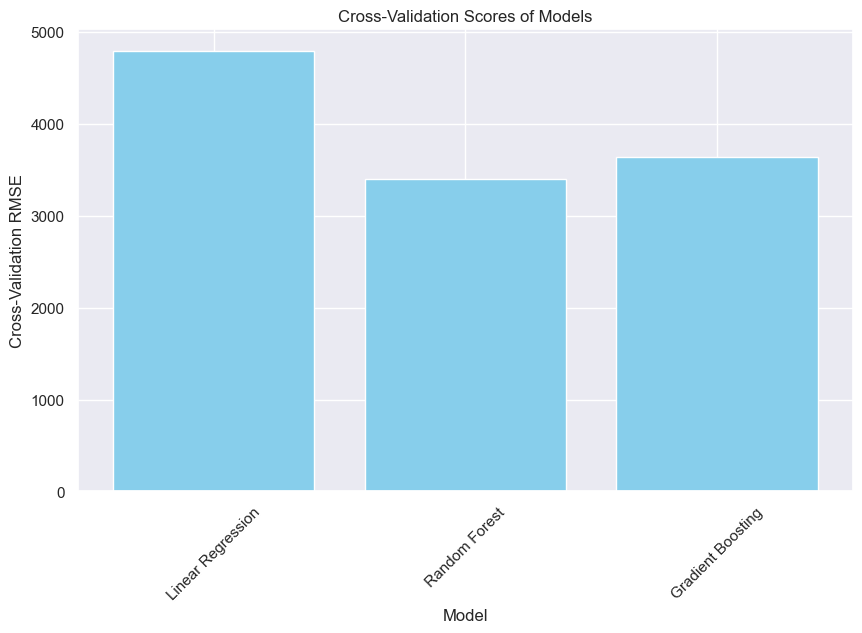

In [57]:
plt.figure(figsize=(10, 6))
plt.bar(cv_scores.keys(), cv_scores.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Cross-Validation RMSE')
plt.title('Cross-Validation Scores of Models')
plt.xticks(rotation=45)
plt.show()

- `Random Forest` stands out as the most suitable model due to its lower cross-validation score as compared to the `Linear Regression` and `Gradient Boosting` models.

##### 6.2 Kaggle Submission File and Pickle Files

In [58]:
# Create Kaggle submission file
df_test = pd.read_csv("df_test.csv")
submission_df = pd.DataFrame({
    'time': df_test['time'],
    'load_shortfall_3h': test_predictions
})

submission_df.to_csv('submission.csv', index=False)

In [59]:
# Save trained model into a pickle file
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print(f"Best model ({best_model_name}) saved to best_model.pkl with validation of RMSE: {val_rmse:.4f}")

Best model (Random Forest) saved to best_model.pkl with validation of RMSE: 3320.7579


In [69]:
# Save trained model that used numerical dataFrame into a pickle file
with open('random_forest.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print(f"Best model ({best_model_name}) saved to best_model.pkl with validation of RMSE: {val_rmse:.4f}")

Best model (Random Forest) saved to best_model.pkl with validation of RMSE: 4334.6086


<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model Explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

Linear Regression, Random Forest, and Gradient Boosting are all suitable models for the problem of modeling the shortfall between energy generated by means of fossil fuels and various renewable sources in Spain, based on city-specific weather features. 

##### 1. Linear Regression:

- Interpretability: Linear Regression provides a clear interpretation of the relationship between the independent variables (weather features) and the dependent variable (energy shortfall). This can help in understanding the impact of each weather feature on the energy shortfall.
- Simplicity: Linear Regression is simple and easy to implement. It serves as a baseline model for comparison with more complex models.
- Assumption Check: Linear Regression assumes a linear relationship between the independent and dependent variables. Although this assumption might not hold perfectly in all cases, it can still provide meaningful insights into the data.

##### 2. Random Forest:
- Non-linearity: Random Forest can capture non-linear relationships between the weather features and the energy shortfall. It works well when the relationship is complex and cannot be adequately captured by a linear model.
- Robustness to Outliers: Random Forest is robust to outliers and noise in the data. Since real-world datasets often contain outliers and inconsistencies, Random Forest can handle them effectively without being heavily influenced by them.
- Feature Importance: Random Forest provides a feature importance measure, which can help identify the most significant weather features impacting the energy shortfall. This can be valuable for understanding the driving factors behind the energy generation dynamics.

##### 3. Gradient Boosting
- Ensemble Learning: Gradient Boosting, like Random Forest, is an ensemble learning technique that combines multiple weak learners to form a strong learner. It sequentially improves the model's performance by focusing on the errors of the previous models.
- High Predictive Accuracy: Gradient Boosting typically yields high predictive accuracy. It can capture complex relationships in the data and adapt to different types of data distributions.
- Regularization: Gradient Boosting includes regularization techniques like shrinkage and tree pruning, which help prevent overfitting and improve generalization performance.

# Conclusion
#### Best Model Selection
`Random Forest` emerges as the best model for predicting the energy shortfall between fossil fuels and renewable sources.
- **Lowest Cross-Validation Score**: The Random Forest model has the lowest cross-validation score of 3404.62 indicating it performs better on unseen data compared to Linear Regression and Gradient Boosting. Lower scores signify better model performance in terms of predicting the energy shortfall accurately.


- **Validation Root Mean Squared Error (RMSE)**: The Random Forest model has a RMSE of 3320.76, which supports its effectiveness in minimizing prediction errors. RMSE is a commonly used metric for regression tasks, measuring the average magnitude of the prediction error. A lower RMSE indicates better predictive accuracy.

In summary, Random Forest stands out as the most suitable model for this problem due to its lower cross-validation score, favorable validation RMSE, and reasonable test predictions. Its ability to handle non-linear relationships and robustness to outliers further solidifies its selection as the best model for predicting energy shortfall in this context.